### Task 1 
Implement the NAND Boolean Logic Gate using a Perceptron Neural Network. 
- Inputs: x1, x2, bias
- Train using perceptron learning rule 
- Output: y
- Display final weights and bias 
- Verify truth table results 

In [152]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [153]:
X = np.array([[0,0],[0,1],[1,1],[1,0]])

In [154]:
y = np.array([1,1,0,1])

In [155]:
weights = np.random.rand(2,1)
bias = np.random.rand(1)

In [156]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [157]:
def perceptron(X, weights, bias):
    z = np.dot(X,weights) + bias
    a = sigmoid(z)
    return a

In [158]:
w = np.random.rand(2)
b = np.random.rand(1)

epochs = 50
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(X.shape[0]):
        y_pred = perceptron(X[i], w, b)
        error = y[i] - y_pred
        w += learning_rate * error * X[i]
        b += learning_rate * error

print("Trained weights:", w)
print("Trained bias:", b)


Trained weights: [-0.90287604 -0.95202605]
Trained bias: [1.77487895]


In [159]:
def step(x):
    return 1 if x >= 0.5 else 0

In [160]:
print("\nPredictions:")
for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    print(f"Input: {X[i]} → Output:", step(sigmoid(z)))


Predictions:
Input: [0 0] → Output: 1
Input: [0 1] → Output: 1
Input: [1 1] → Output: 0
Input: [1 0] → Output: 1


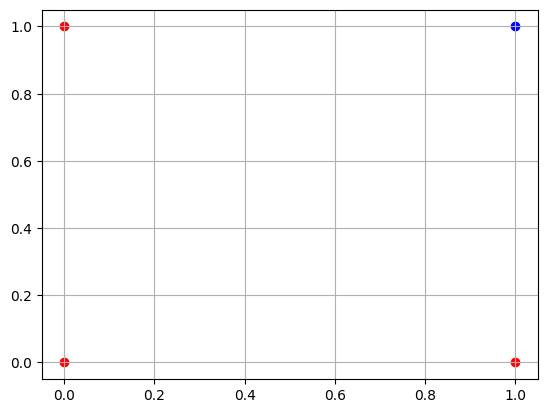

In [161]:
import matplotlib.pyplot as plt
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c='r' if y[i] == 1 else 'b')
plt.grid()

### Task 2 
Use the Iris Dataset 
- Normalize the input features 
- Perform Min–Max scaling 
- Visualize original vs normalized features 

#### Load Iris Dataset

In [162]:
# Standardization (Normalization) - mean=0, std=1
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Iris dataset
iris = load_iris()
X_original = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Original Iris Dataset:")
print(X_original.head())
print(f"\nShape: {X_original.shape}")
print(f"\nStatistics:\n{X_original.describe()}")

print("\n" + "="*70 + "\n")

scaler_standard = StandardScaler()
X_normalized = pd.DataFrame(
    scaler_standard.fit_transform(X_original),
    columns=X_original.columns
)

print("Normalized Dataset (Standardization):")
print(X_normalized.head())
print(f"\nStatistics:\n{X_normalized.describe()}")

Original Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Shape: (150, 4)

Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.

In [163]:
# Min-Max Scaling - scale to [0, 1] range
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(X_original),
    columns=X_original.columns
)

print("Min-Max Scaled Dataset:")
print(X_minmax.head())
print(f"\nStatistics:\n{X_minmax.describe()}")

Min-Max Scaled Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667          

#### Visualize Original vs Normalized Features

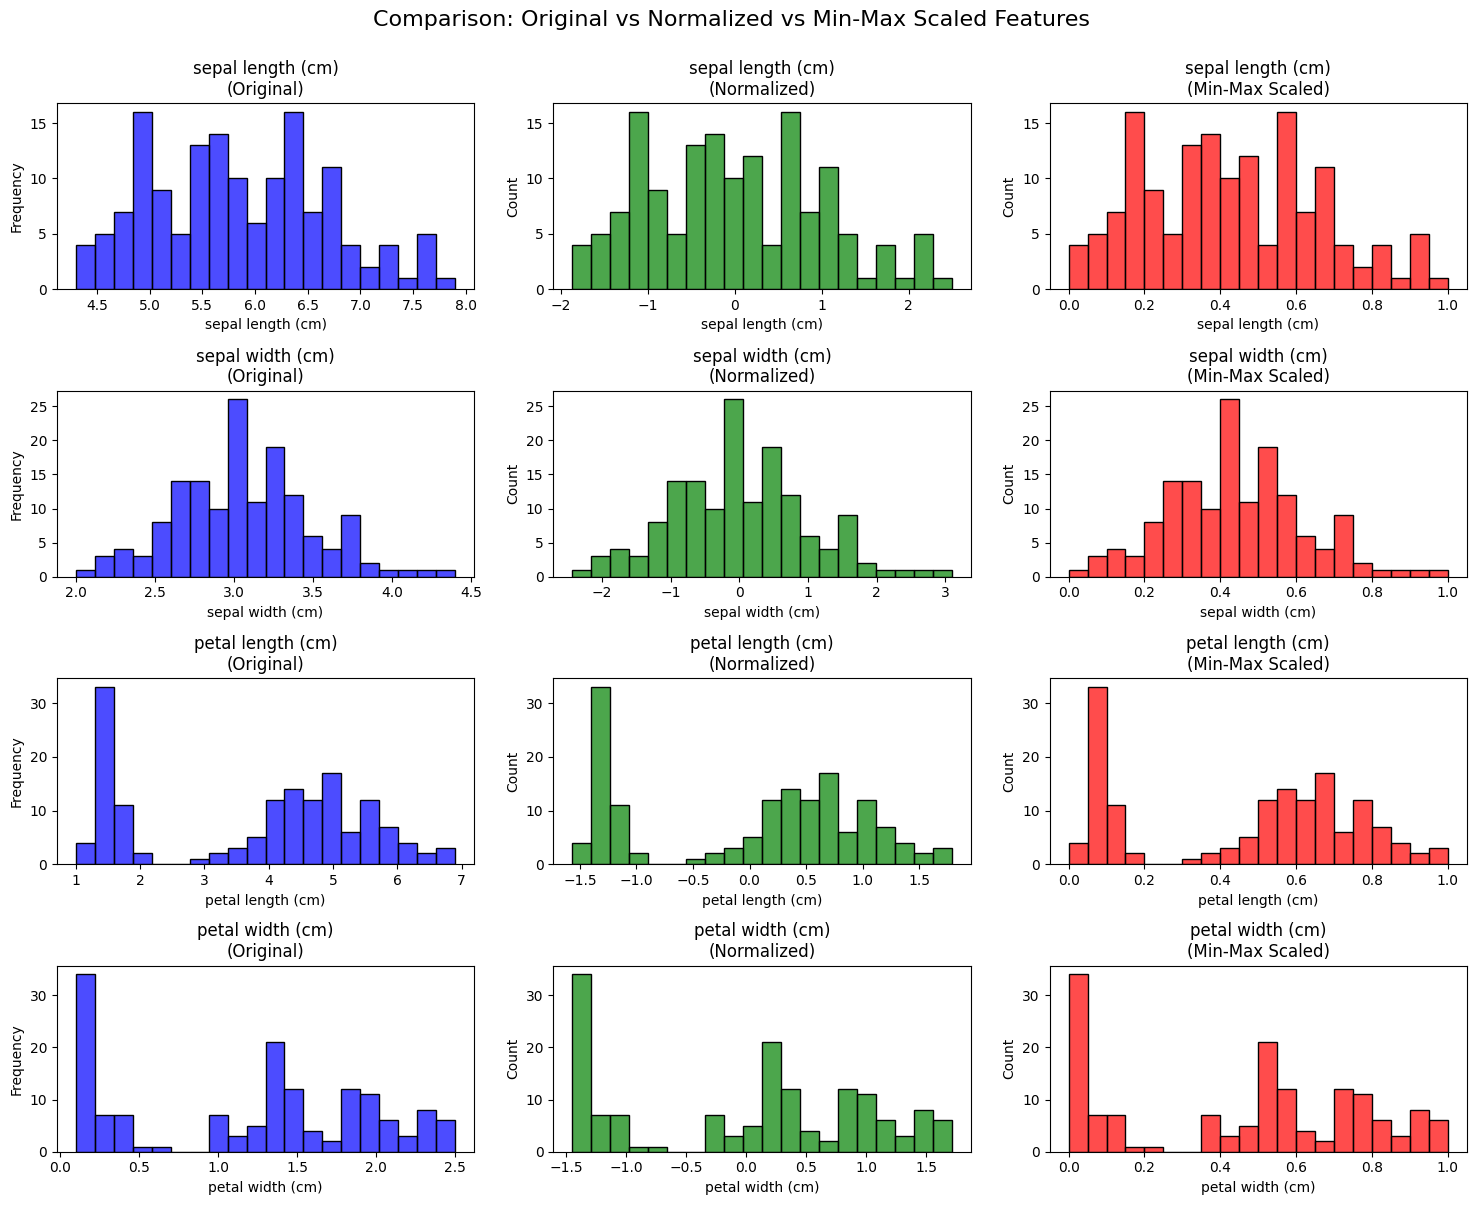

In [164]:
# Visualize distributions for all features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Comparison: Original vs Normalized vs Min-Max Scaled Features', fontsize=16, y=1.00)

for i, feature in enumerate(X_original.columns):
    # Original
    sns.histplot(X_original[feature], bins=20, color='blue', alpha=0.7, edgecolor='black', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature}\n(Original)')
    axes[i, 0].set_ylabel('Frequency')
    
    # Normalized (Standardized)
    sns.histplot(X_normalized[feature], bins=20, color='green', alpha=0.7, edgecolor='black', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature}\n(Normalized)')
    
    # Min-Max Scaled
    sns.histplot(X_minmax[feature], bins=20, color='red', alpha=0.7, edgecolor='black', ax=axes[i, 2])
    axes[i, 2].set_title(f'{feature}\n(Min-Max Scaled)')

plt.tight_layout()
plt.show()

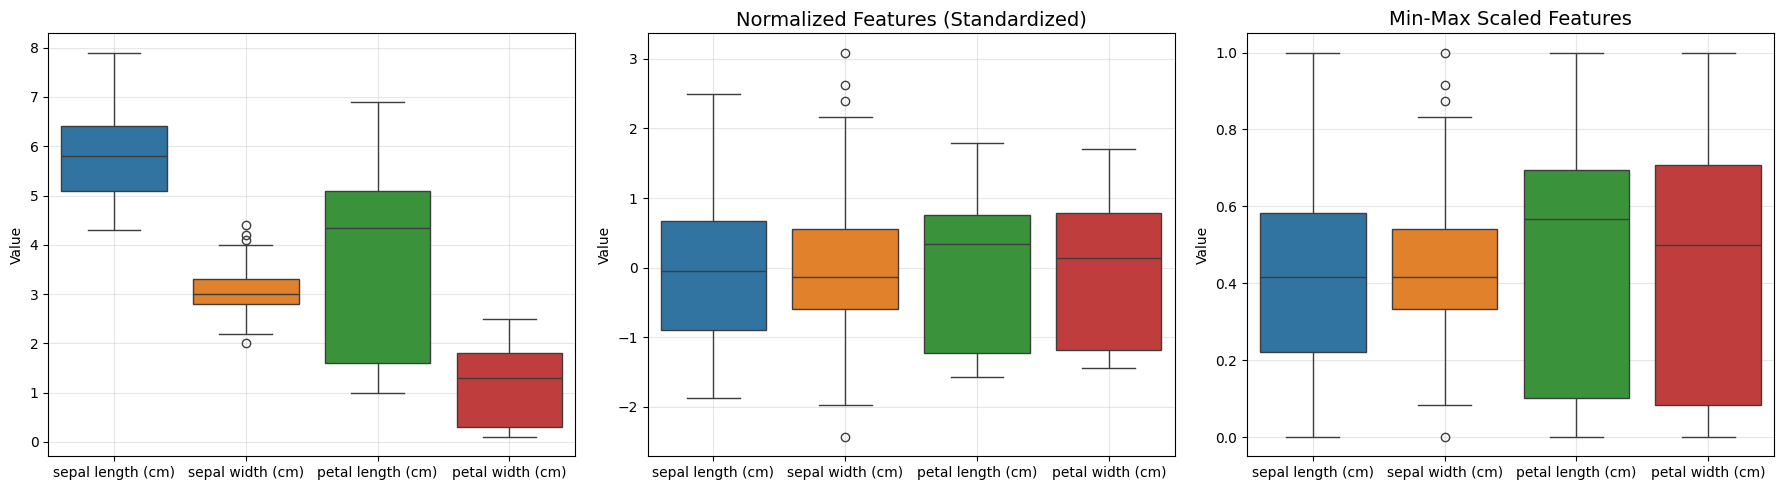

In [165]:
# Box plots comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
import seaborn as sns 

# Original
sns.boxplot(data=X_original, ax=axes[0])
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Normalized
sns.boxplot(data=X_normalized, ax=axes[1])
axes[1].set_title('Normalized Features (Standardized)', fontsize=14)
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

# Min-Max Scaled
sns.boxplot(data=X_minmax, ax=axes[2])
axes[2].set_title('Min-Max Scaled Features', fontsize=14)
axes[2].set_ylabel('Value')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [166]:
# Summary comparison
print("="*70)
print("COMPARISON SUMMARY")
print("="*70)

print("\n1. ORIGINAL DATA:")
print(f"   Range: [{X_original.min().min():.2f}, {X_original.max().max():.2f}]")
print(f"   Mean: {X_original.mean().mean():.2f}")
print(f"   Std: {X_original.std().mean():.2f}")

print("\n2. NORMALIZED (STANDARDIZED):")
print(f"   Range: [{X_normalized.min().min():.2f}, {X_normalized.max().max():.2f}]")
print(f"   Mean: {X_normalized.mean().mean():.2f}")
print(f"   Std: {X_normalized.std().mean():.2f}")

print("\n3. MIN-MAX SCALED:")
print(f"   Range: [{X_minmax.min().min():.2f}, {X_minmax.max().max():.2f}]")
print(f"   Mean: {X_minmax.mean().mean():.2f}")
print(f"   Std: {X_minmax.std().mean():.2f}")

print("\n" + "="*70)

COMPARISON SUMMARY

1. ORIGINAL DATA:
   Range: [0.10, 7.90]
   Mean: 3.46
   Std: 0.95

2. NORMALIZED (STANDARDIZED):
   Range: [-2.43, 3.09]
   Mean: -0.00
   Std: 1.00

3. MIN-MAX SCALED:
   Range: [0.00, 1.00]
   Mean: 0.45
   Std: 0.26



In [167]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Iris dataset
iris = load_iris()
X_original = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Original Iris Dataset:")
print(X_original.head())
print(f"\nShape: {X_original.shape}")
print(f"\nStatistics:\n{X_original.describe()}")

Original Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Shape: (150, 4)

Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.